# Project: Predict next-day rain in Australia


## Problem Statement:

* This dataset contains about 10 years of daily weather observations from many locations across Australia.

* A binary classification Problem 

* Forecast Tomorrow will be rain or not 
This dataset contains about 10 years of daily weather observations from many locations across Australia. Before any processing, we must first obtain information about the data we are going to use.

## Data Dictionary

**Task to perform**

 predict the target variable Rain_Tomorrow
  the column which are the input are as follows:


*   DATE: the date if each day is provided to check the data is consistent, we can break date in day, month and year.
*   LOCATION: Albury, New castle, Richmode and other areas of Australia is covered
*   MIN TEMP: Min temperatura of each location is provided which helps to check the humidity of the environment
*   MAX TEMP: Max temperature is given to check the probablity of rain
*   RANFALL: Rainfall record is also given, there are som areas where 0.0 value is given so there were no rain happen about 10 years in that region.
*   EVAPORATION: Mostly the value of evaporation is NAN in different areas.
*   SUNSHNE: Sunshine value is mostly null in areas which the cloudy environment.
*   WIND GUST DIR: The direction od wind blowing is provided there.
*   WIND GUST SPEED: The speed of wind is also provided there.
*   WindDir9am : The direction of wind at specific time is there so the comparison b/w different times will help in analysis of Rain_Tomorrow.
*   WindDir3pm : Speed direction at 3pm
*   WindSpeed9am :  Within Australia, wind speeds are generally presented in kilometres per hour. Thats why different time stamp wind speed is given there.
*   WindSpeed3pm : As above, due to change of wind speed per hour, this will help to predict the target variable.
*   Humidity9am : The humidity ranges b/w 6 hours in Australia.
*   Humidity3pm : As above, 6 hours change is provided for analysis
*   Pressure9am : Pressure rate per 6 hours is given
*   Pressure3pm	: As it ranges or varies from 6 hours, the data will help to find accurate results.
*   Cloud9am : The weather changes about 6 hours 
*   Cloud3pm : 6 hours gap in cloudy env data will helpful in prediction.
*   Temp9am	: Temperature varien from north to south
*   Temp3pm	: Temperature also varies fom 6 hours time stamp
*   RainToday	: Rain Today is helpful to predict either its going to rai tomorrow.
*   RainTomorrow : Rain Tomorrow is our target variable to predict the rain in Australia by using above given features. 

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Loading the Dataset:

In [2]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Overview of the Data:

In [4]:
data.shape

(145460, 23)

In [5]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Cast all text to lower-case:

In [8]:
# Change all text to lower-case
data = data.applymap(lambda s: s.lower() if type(s) == str else s)
data.columns=data.columns.str.strip().str.lower()
data

# Preview changes
data.head(5)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,albury,13.4,22.9,0.6,NaN,NaN,w,44.0,w,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,no,no
1,2008-12-02,albury,7.4,25.1,0.0,NaN,NaN,wnw,44.0,nnw,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,no,no
2,2008-12-03,albury,12.9,25.7,0.0,NaN,NaN,wsw,46.0,w,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,no,no
3,2008-12-04,albury,9.2,28.0,0.0,NaN,NaN,ne,24.0,se,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,no,no
4,2008-12-05,albury,17.5,32.3,1.0,NaN,NaN,w,41.0,ene,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,no,no


###  Checking the Missing data Pattern in Dataset:

In [9]:
# Checking for null values in training dataset
missing = pd.DataFrame(data.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(data)).round(2)*100
missing

,no.of missing values,% missing_values
date,0,0.0
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0


In [10]:
data["date"] = pd.to_datetime(data["date"])   #Converting into Date
data["year"] = data["date"].dt.year           #abstracting year in different column 
data["month"] = data["date"].dt.month         #abstracting month in diffrent column  
data["day"] = data["date"].dt.day             #abstracting day in diffrent column  

In [11]:
data.drop('date', axis = 1, inplace = True)

data.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,albury,13.4,22.9,0.6,NaN,NaN,w,44.0,w,wnw,...,1007.1,8.0,NaN,16.9,21.8,no,no,2008,12,1
1,albury,7.4,25.1,0.0,NaN,NaN,wnw,44.0,nnw,wsw,...,1007.8,NaN,NaN,17.2,24.3,no,no,2008,12,2
2,albury,12.9,25.7,0.0,NaN,NaN,wsw,46.0,w,wsw,...,1008.7,NaN,2.0,21.0,23.2,no,no,2008,12,3
3,albury,9.2,28.0,0.0,NaN,NaN,ne,24.0,se,e,...,1012.8,NaN,NaN,18.1,26.5,no,no,2008,12,4
4,albury,17.5,32.3,1.0,NaN,NaN,w,41.0,ene,nw,...,1006.0,7.0,8.0,17.8,29.7,no,no,2008,12,5


## Exploratary data analysis:
now, its time to explore the data to dain insights about it.

<AxesSubplot:ylabel='raintomorrow'>

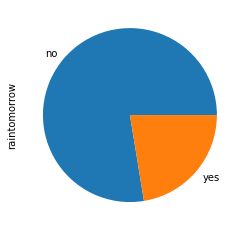

In [12]:
data['raintomorrow'].value_counts().plot(kind='pie')

## Sunshine VS Evaporation

<AxesSubplot:xlabel='sunshine', ylabel='evaporation'>

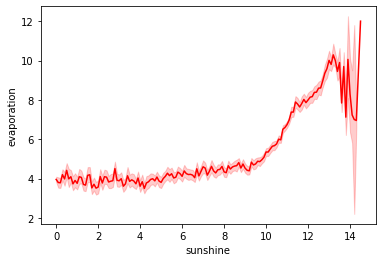

In [13]:
sns.lineplot(data=data,x='sunshine',y='evaporation',color='red')

<AxesSubplot:xlabel='sunshine', ylabel='rainfall'>

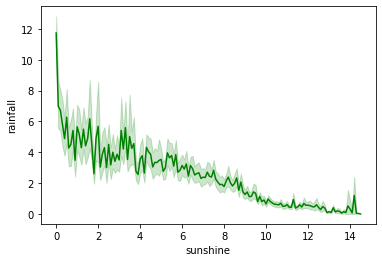

In [14]:
sns.lineplot(data= data,x="sunshine",y="rainfall",color = "green")

In [15]:
# Extact numerical features
num_col=data.select_dtypes(include=np.number).columns.to_list()
len(num_col)


19

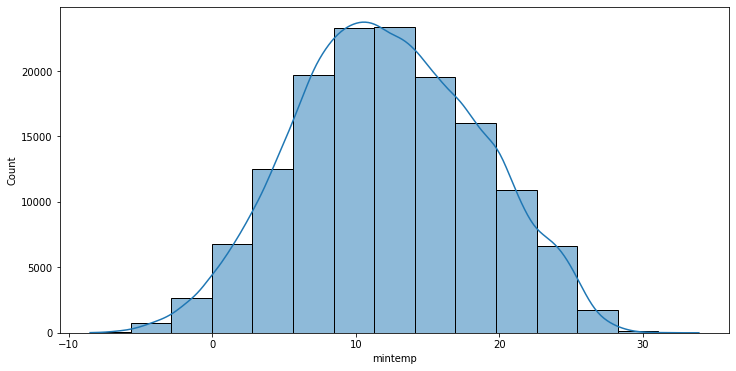

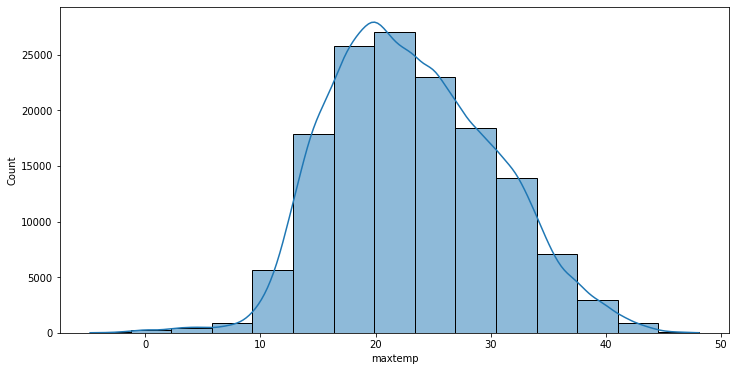

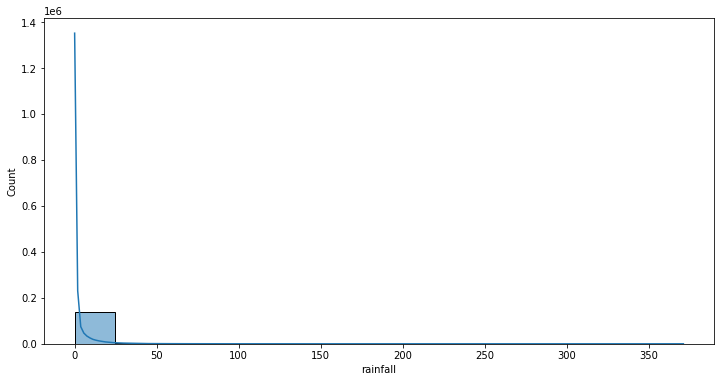

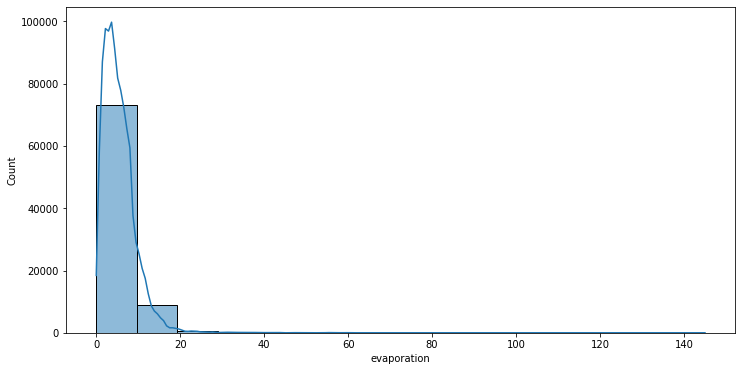

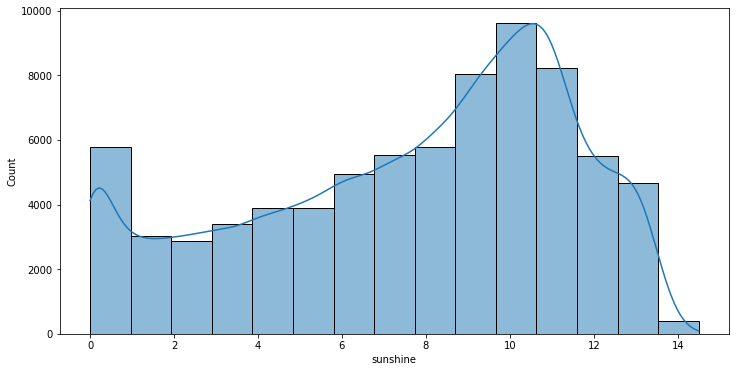

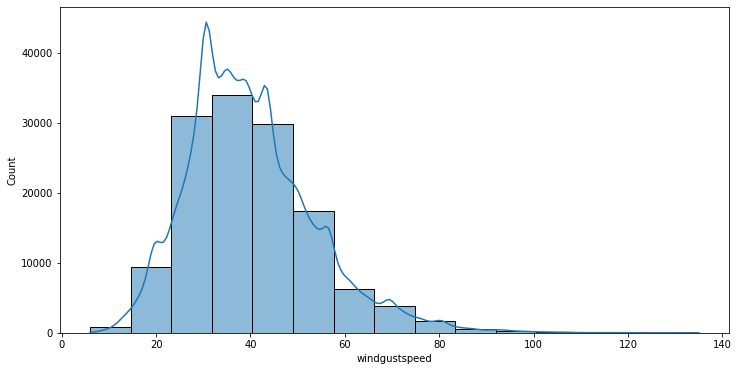

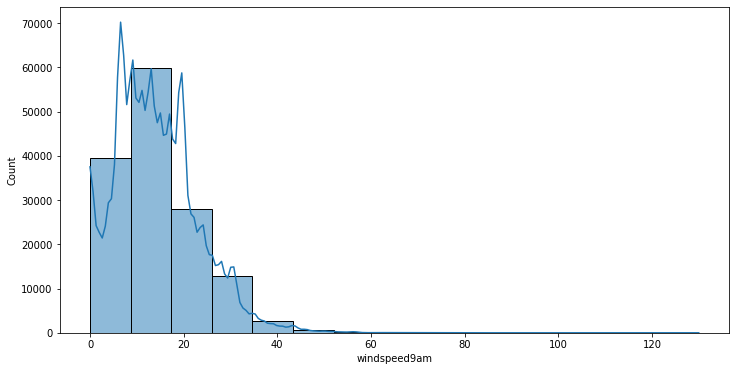

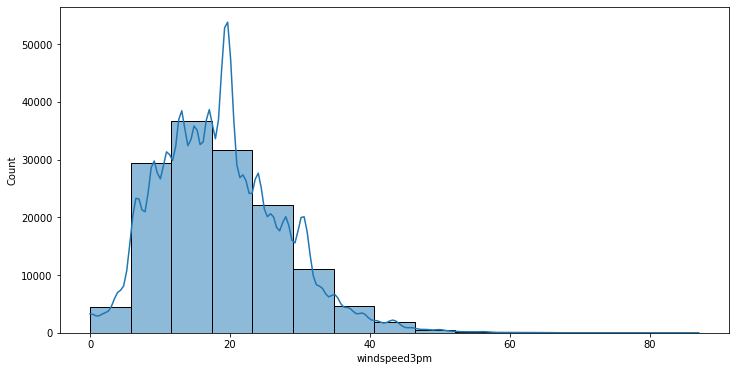

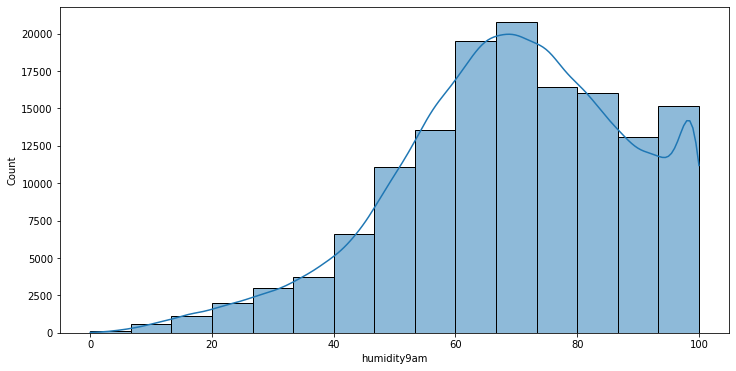

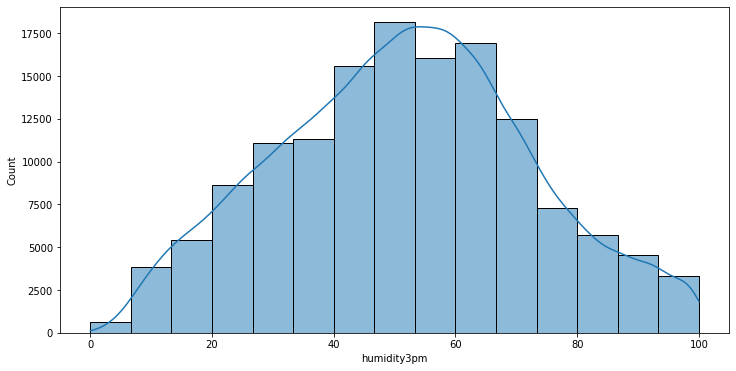

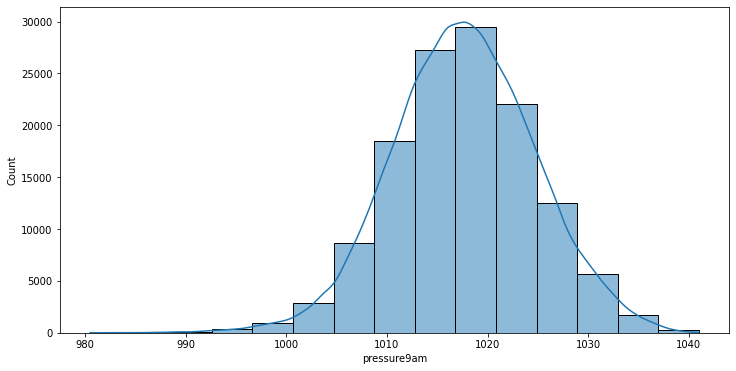

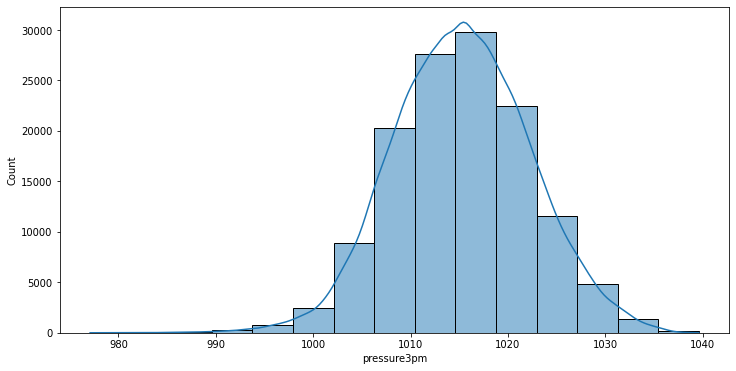

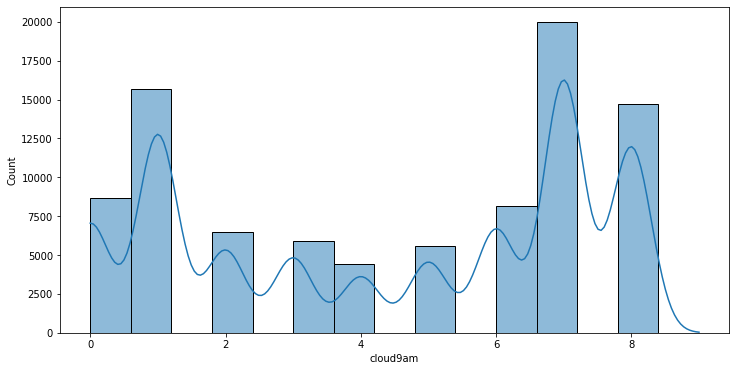

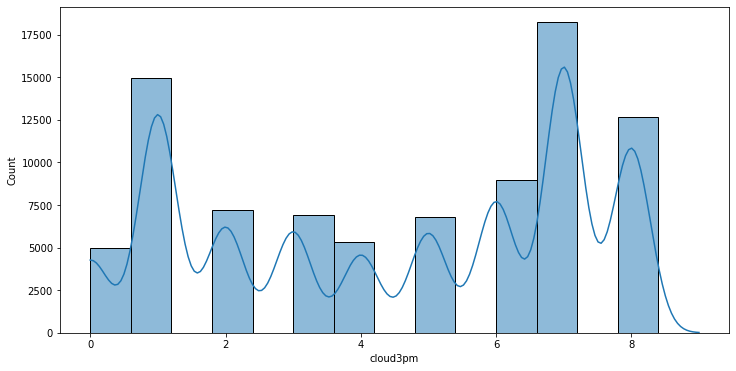

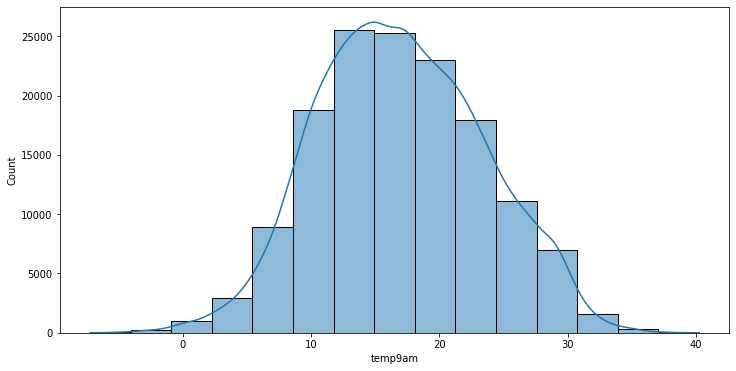

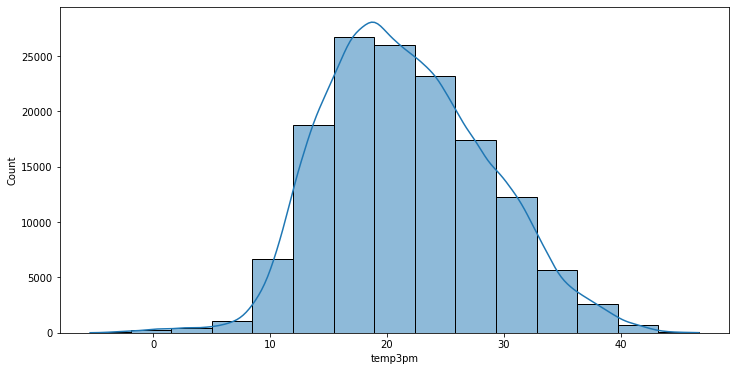

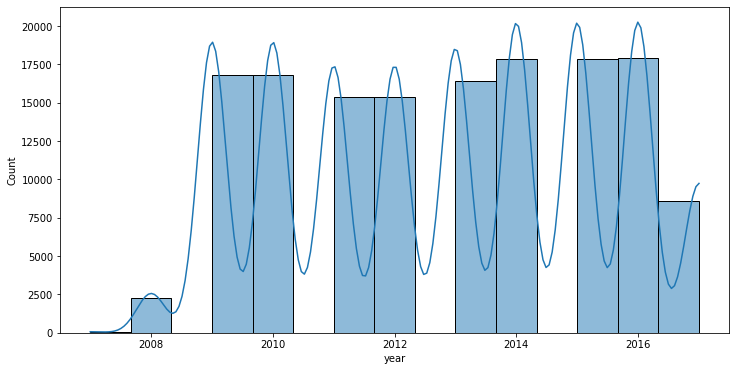

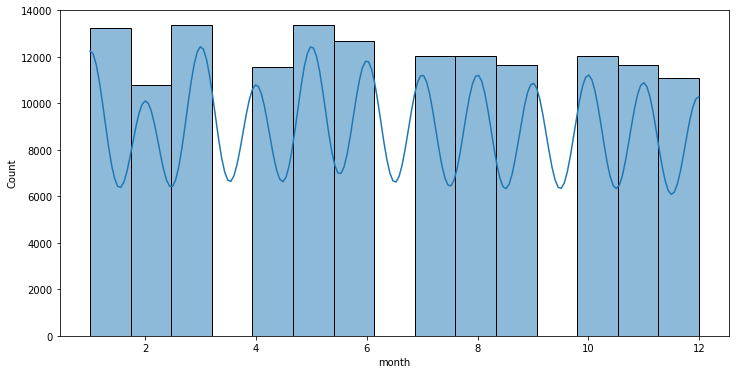

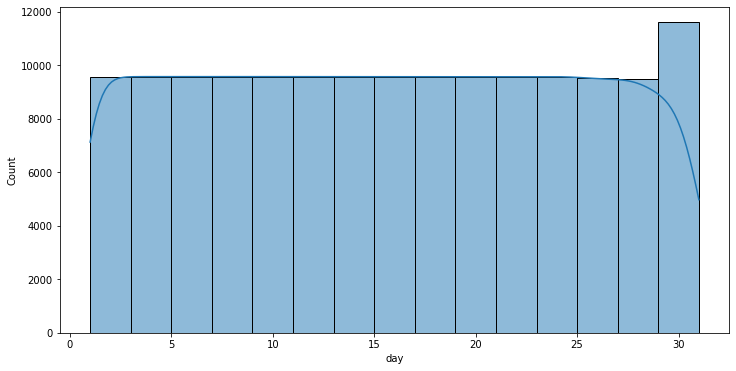

In [16]:
for i in num_col:
    plt.figure(figsize=(12,6));
    sns.histplot(data[i],bins=15, kde=True);

## Handling missing values
### For Categorical Variables:

In [17]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype =="O"]
categorical_features

['location',
 'windgustdir',
 'winddir9am',
 'winddir3pm',
 'raintoday',
 'raintomorrow']

In [18]:
missing_cat = data[categorical_features].isnull().sum() # Total missing values 
print(missing_cat)

location            0
windgustdir     10326
winddir9am      10566
winddir3pm       4228
raintoday        3261
raintomorrow     3267
dtype: int64


<BarContainer object of 6 artists>

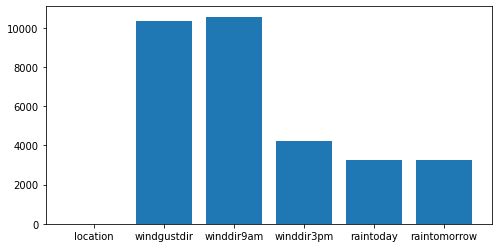

In [19]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values ) # by visualization we can see that winDir3pm has large number of missing values 

In [20]:
cat_features_with_null = [features for features in categorical_features if data[features].isnull().sum()]  # list will return with categorical features
for each_feature in cat_features_with_null:
  data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0])     #each cat_feature is filled by most repeated value 


In [21]:
data[categorical_features].isnull().sum()  # here we can see ther is no missing values now 

location        0
windgustdir     0
winddir9am      0
winddir3pm      0
raintoday       0
raintomorrow    0
dtype: int64

## For Continous Features:

In [22]:
#numerical features extraction from the data 
num_col = [num_col for num_col in data.columns if data[num_col].dtype !="O"] 

In [23]:
missing_num = data[num_col].isnull().sum()    # counting missing values in each  num_feature 
missing_num

mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustspeed    10263
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

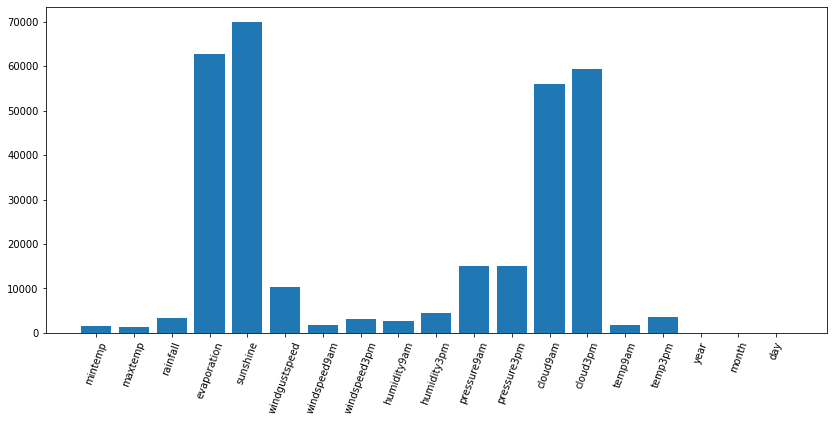

In [24]:
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)

In [25]:
num_col_with_null_values = [col for col in num_col if data[col].isnull().sum()]
missing_values = data[num_col_with_null_values].isnull().sum()
missing_values

mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustspeed    10263
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
dtype: int64

<AxesSubplot:>

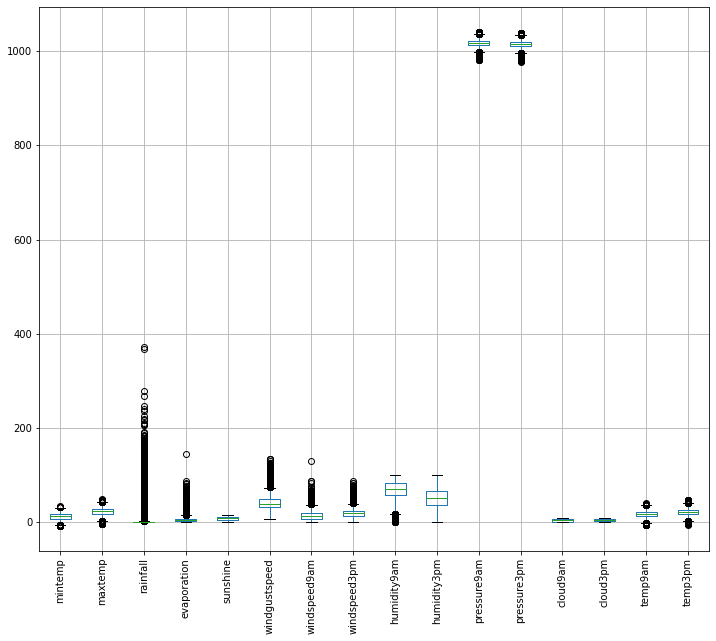

In [26]:
# we can not directly impute missing values by using mean becuase there could be a chance of outliers in the data 
# lets check by box plot 
plt.figure(figsize=(12,10))
data.boxplot(num_col_with_null_values,rot = 90)

In [27]:
# we can see that there are many outliers in specially Rainfall and other featrures 
# lets handle this 
# Remove Outliers from Numerical Features 

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  data.loc[data[feature]<lower_limit, feature] = lower_limit
  data.loc[data[feature]>upper_limit, feature] = upper_limit

# after running this the outliers will be removed from our numerical features of the data 

<AxesSubplot:>

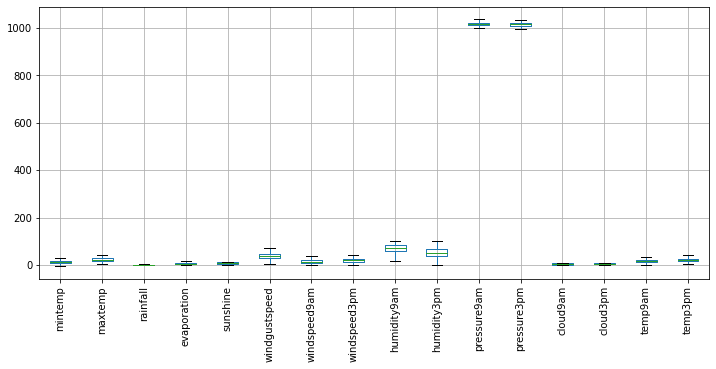

In [28]:
plt.figure(figsize=(12,5))
data.boxplot(num_col_with_null_values,rot = 90)    # we can see there is no outliers now 

In [29]:
for features in num_col_with_null_values:
  data[features] = data[features].fillna(data[features].mean())   # all missing values imputed by mean 

In [30]:
data[num_col_with_null_values].isnull().sum()  # we can see there is no null values now 

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
dtype: int64

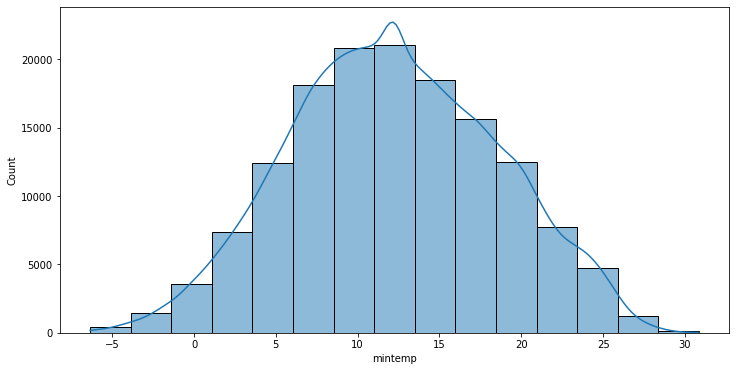

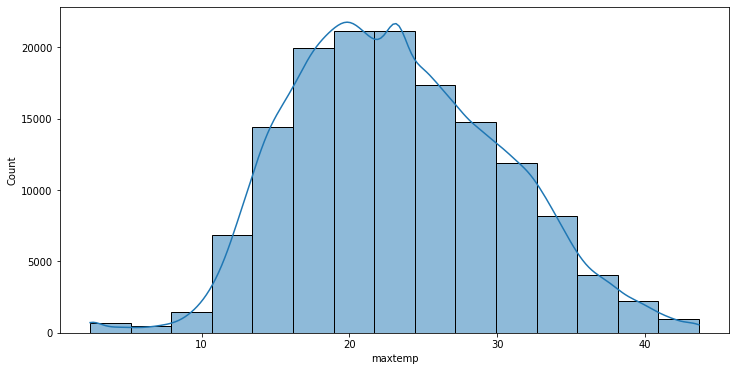

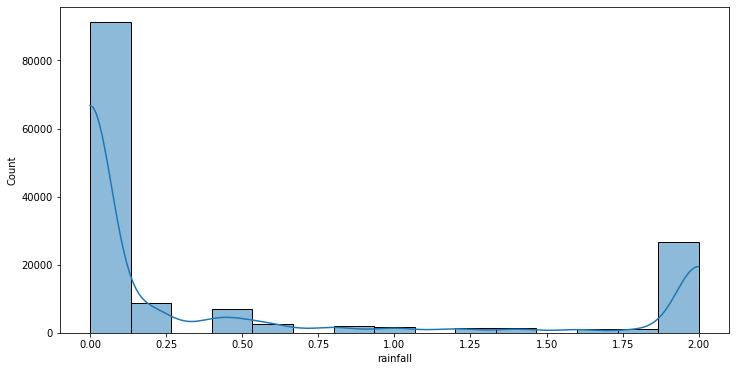

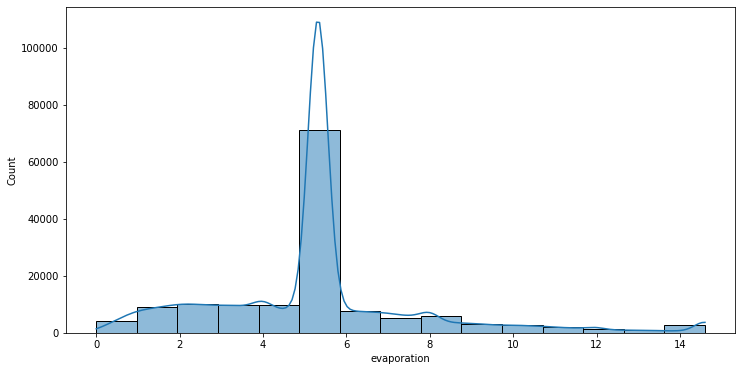

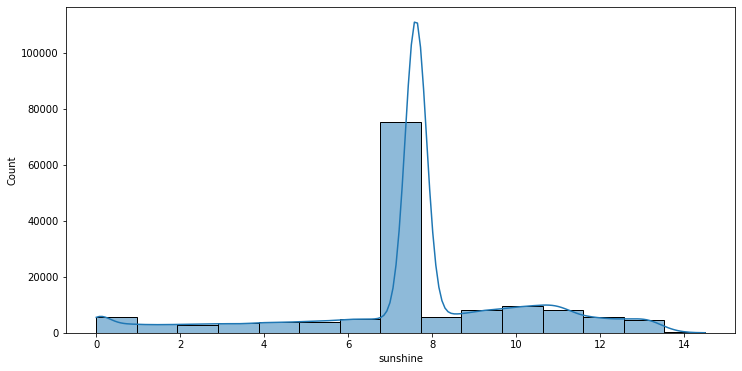

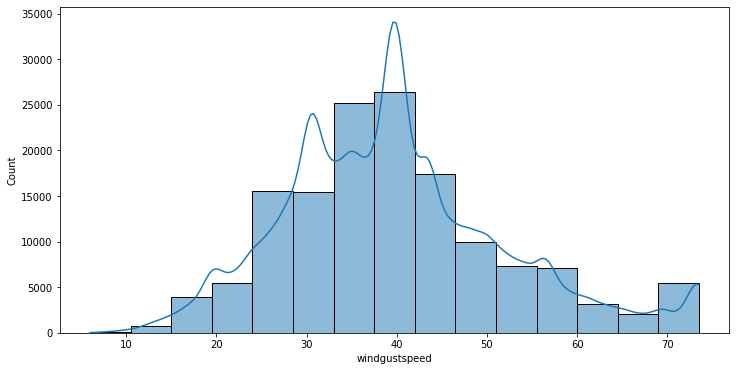

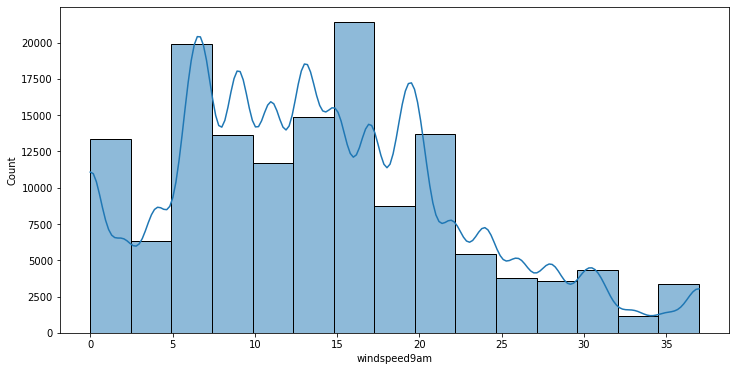

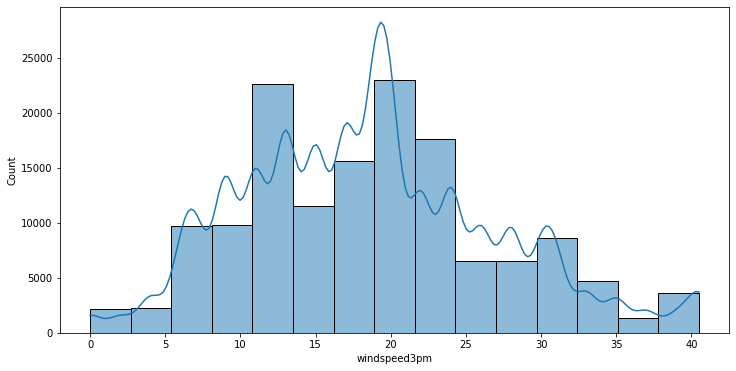

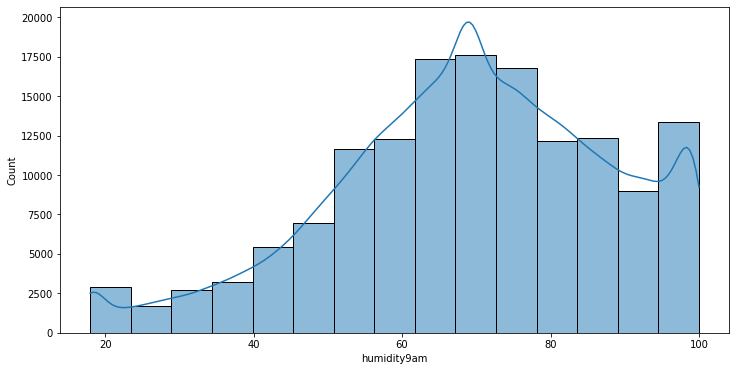

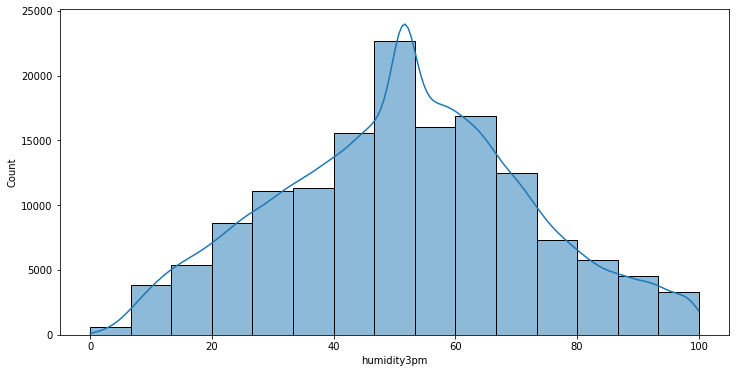

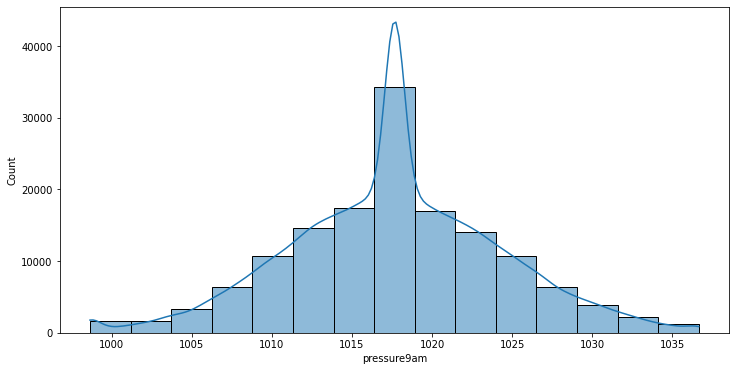

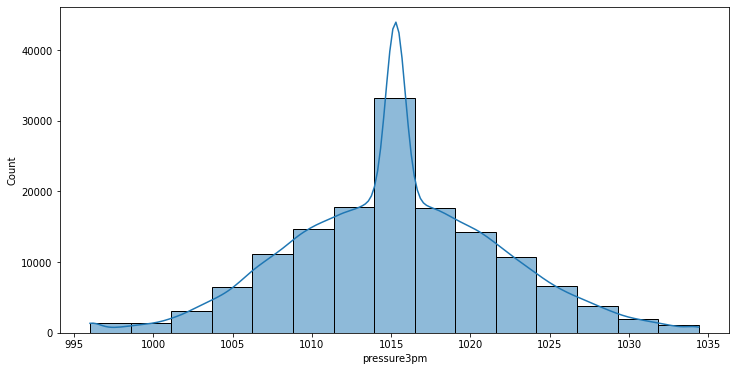

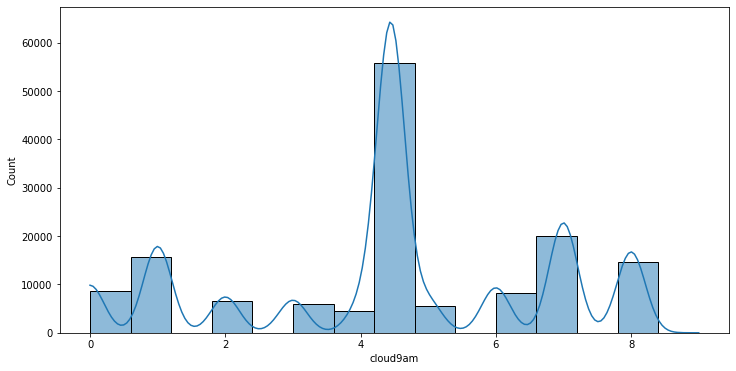

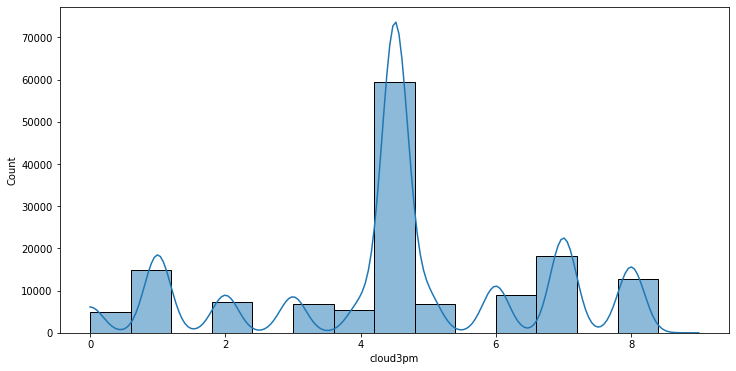

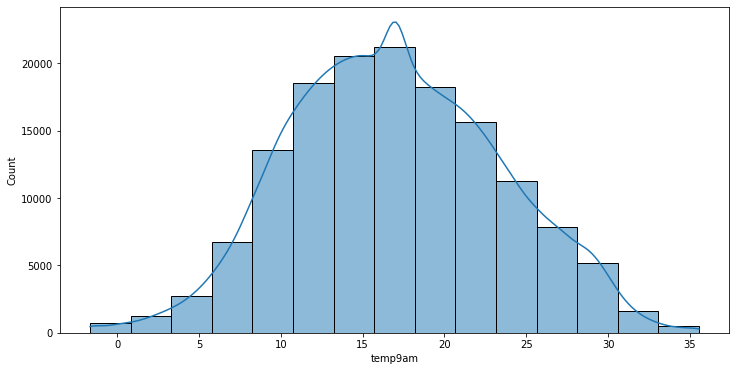

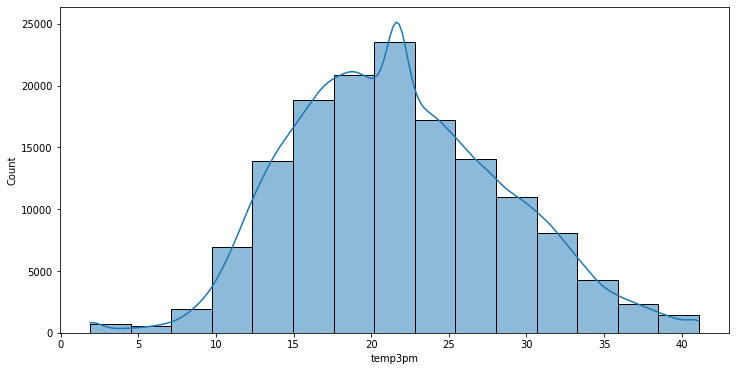

In [31]:
for i in num_col_with_null_values:
    plt.figure(figsize=(12,6));
    sns.histplot(data[i],bins=15, kde=True);

<AxesSubplot:>

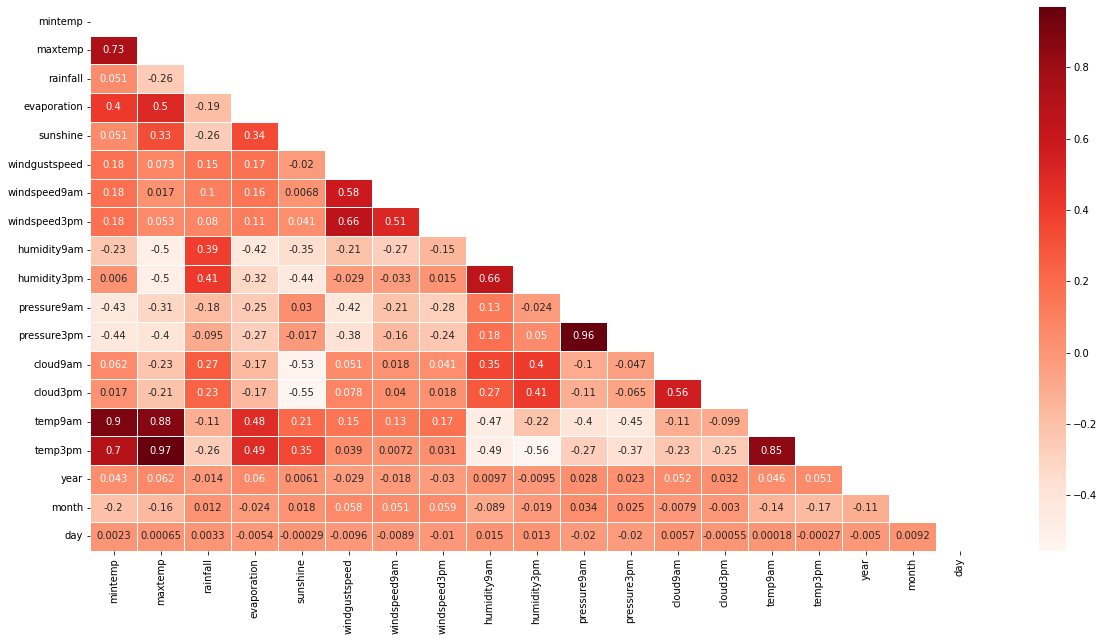

In [32]:
# Checking for the correlation between eachother by using heatmap
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
sns.heatmap(data.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

The following pairs of features are having high correlation between them:

* MaxTemp and MinTemp
* Pressure9am and Pressure3pm
* Temp9am and Temp3pm
* Evaporation and MaxTemp
* MaxTemp and Temp3pm

### Plot Histogram for month:

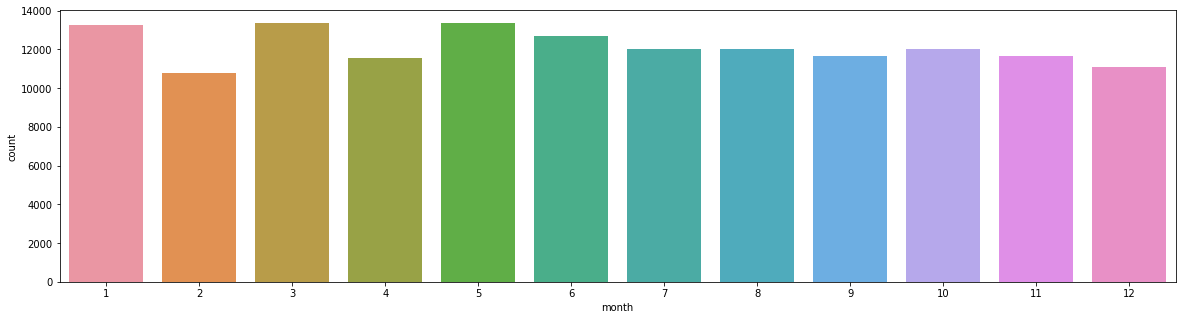

In [33]:
# Histogram that represent the data of month column
plt.figure(figsize=(20,5))
sns.countplot(data['month'])
plt.show()

Observation  : The diagram indicates that rainfall in Australia is highly variable, largely because of large-scale atmospheric and oceanic drivers that affect the region. The most important driver of Australian rainfall variability is ENSO, particularly for rainfall across eastern Australia, excluding Tasmania. This leads to very high year-to-year rainfall variability, such that long-term trends because of climate change are harder to distinguish than for temperature.


## Label Encoding:

In [34]:
# Convert categorized values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[categorical_features] =data[categorical_features].astype('str').apply(le.fit_transform)

In [35]:
# Preview changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  int32  
 1   mintemp        145460 non-null  float64
 2   maxtemp        145460 non-null  float64
 3   rainfall       145460 non-null  float64
 4   evaporation    145460 non-null  float64
 5   sunshine       145460 non-null  float64
 6   windgustdir    145460 non-null  int32  
 7   windgustspeed  145460 non-null  float64
 8   winddir9am     145460 non-null  int32  
 9   winddir3pm     145460 non-null  int32  
 10  windspeed9am   145460 non-null  float64
 11  windspeed3pm   145460 non-null  float64
 12  humidity9am    145460 non-null  float64
 13  humidity3pm    145460 non-null  float64
 14  pressure9am    145460 non-null  float64
 15  pressure3pm    145460 non-null  float64
 16  cloud9am       145460 non-null  float64
 17  cloud3pm       145460 non-nul

## Splitting Data into X and Y:

In [36]:
# Let's first drop target variable
x = data.drop(['raintomorrow'], axis = 1)
y = data['raintomorrow']

## Feature Scaling:

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

## Spliting Dataset into Traning set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Model Training:

* Model: Random Forest
* Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.
* Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [40]:
classifier.score(X_train,Y_train)

0.9999828131445071

In [41]:
Y_pred=classifier.predict(X_test)

In [42]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8555272927265227